In [1]:
from emceeFit import *

In [12]:
#sampler,pos,prob,state,flat_samples = main(True,False,burn=10,iter=100)
main(True,True,burn=1,iter=100)

running with 4 threads
running burn-in


  0%|          | 0/1 [00:00<?, ?it/s]/home/kirk/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1/1 [00:07<00:00,  7.93s/it]


production run (n = 100 iterations)


100%|██████████| 100/100 [16:55<00:00, 10.16s/it]


In [13]:
samples = sampler.get_chain()
samples[:,0,:]
prob0 = sampler.get_log_prob()
plt.plot(prob0)

NameError: name 'sampler' is not defined

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys,math

font = {'family' : 'DejaVu Serif',
    'weight' : 'normal',
    'size'   : 16}
plt.rc('font', **font) #set all plot attribute defaults

def pltFormatter(fig,axList,**kwargs):
    for ax in axList:
        ax.minorticks_on()
        ax.grid(b=True,which="major",alpha=0.5)
        ax.grid(b=True,which="minor",alpha=0.3)
        ax.set_xticks([2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.20,2.21,2.22])
        legend=kwargs.get("legend")
        if legend != None:
            legend.get_frame().set_edgecolor('black') 

def trackPercent(place,totalLength,strLen): #percent output tracker
    percent = place/totalLength*100
    if math.floor(percent)==69:
        string="{:.2f} % complete -- nice".format(percent)
    else:
        string="{:.2f} % complete".format(percent)
    sys.stdout.write("\r") #this "moves the cursor" to the beginning of the I0 line
    sys.stdout.write(" "*strLen) #this "clears" whatever was on the line last time by writing whitespace
    sys.stdout.write("\r") #move the cursor back to the start again
    sys.stdout.write(string) #display the current percent we are at
    sys.stdout.flush() #flush finishes call to print() (this is like what's under the hood of print function)
    strLen=len(string) #return the new string length for next function call
    return strLen

In [42]:
#SummitResults = readPickle('pyEmceeLogVar.p')
#localResults = readPickle('pyEmceeVar.p')
jResults = readPickle('jPyEmceeVar.p')
#SummitResults = readPickle('summitGoodLogVar2.p')
#flat_samples,pos,prob = SummitResults
#flat_samples,pos,prob = localResults
flat_samples,pos,prob = jResults
getProfiles = DiskWind.getProfiles
len(flat_samples[0]) #should be 10 now

10

In [43]:
 for θ in flat_samples[np.random.randint(len(flat_samples), size=10)]:
        print("i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2) = {4:.2f}, f2 (cos^2) = {5:.2f}, f3 (sin*cos)= {6:.2f}".format(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6]))

i = 74.62, rMin = 6146.98, MFac = 0.18, rFac = 34.47, f1 (sin^2) = 0.65, f2 (cos^2) = 0.11, f3 (sin*cos)= 0.49
i = 83.98, rMin = 6314.04, MFac = 0.14, rFac = 47.77, f1 (sin^2) = 0.22, f2 (cos^2) = 0.39, f3 (sin*cos)= 0.72
i = 81.11, rMin = 6500.13, MFac = 0.16, rFac = 39.55, f1 (sin^2) = 0.26, f2 (cos^2) = 0.35, f3 (sin*cos)= 0.66
i = 87.21, rMin = 6464.33, MFac = 0.20, rFac = 36.98, f1 (sin^2) = 0.96, f2 (cos^2) = 0.80, f3 (sin*cos)= 0.75
i = 89.55, rMin = 6723.25, MFac = 0.14, rFac = 41.10, f1 (sin^2) = 0.04, f2 (cos^2) = 0.12, f3 (sin*cos)= 0.61
i = 89.55, rMin = 6664.09, MFac = 0.16, rFac = 38.57, f1 (sin^2) = 0.26, f2 (cos^2) = 0.36, f3 (sin*cos)= 0.54
i = 78.37, rMin = 6273.92, MFac = 0.18, rFac = 33.99, f1 (sin^2) = 0.90, f2 (cos^2) = 0.41, f3 (sin*cos)= 0.82
i = 82.52, rMin = 6627.32, MFac = 0.21, rFac = 35.90, f1 (sin^2) = 0.15, f2 (cos^2) = 0.48, f3 (sin*cos)= 0.47
i = 80.51, rMin = 6300.20, MFac = 0.17, rFac = 42.68, f1 (sin^2) = 0.77, f2 (cos^2) = 0.18, f3 (sin*cos)= 1.00
i

In [5]:
def plotParams(data,θList,mα=0.1,cList=[],labelList=[]):
    λCen=2.172; ν = (data[0]-λCen)/λCen*3e5; ν = data[0] #not really ν anymore but testing wavelength space
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
    fig,axd = plt.subplot_mosaic([['a','b','c']],figsize=(24,6),facecolor="white")
    ax1 = axd["a"]; ax2 = axd["b"]; ax3 = axd["c"]
    ax1.get_shared_x_axes().join(ax1,ax2); ax1.get_shared_x_axes().join(ax1,ax3)
    ax2.get_shared_y_axes().join(ax2,ax3); ax3.set_yticklabels([])
    dodgerBlue=(.12,0.56,1.00)
    ax1.errorbar(ν,data[3],yerr=data[6],marker="o",ms=4,label="3C 273",markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax2.errorbar(ν,np.mean(np.array(data[4])[indx],axis=0),yerr=ν*0+0.07,label="3C 273",marker="o",ms=4,markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax3.errorbar(ν,np.mean(np.array(data[4])[oindx],axis=0),yerr=ν*0+0.07,label="3C 273",marker="o",ms=4,markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax1.fill_between(ν,data[3]-data[6],data[3]+data[6],color=dodgerBlue,alpha=0.5)
    ax2.fill_between(ν,np.mean(np.array(data[4])[indx],axis=0)-0.07,np.mean(np.array(data[4])[indx],axis=0)+0.07,color=dodgerBlue,alpha=0.5)
    ax3.fill_between(ν,np.mean(np.array(data[4])[oindx],axis=0)-0.07,np.mean(np.array(data[4])[oindx],axis=0)+0.07,color=dodgerBlue,alpha=0.5)
    strLen = 0; place = 1; N = len(θList)
    for θ in θList:
        try:
            i,rMin,Mfac,rFac,f1,f2,f3,pa,scale,cenShift = θ
            λCen=2.172+cenShift; #ν = (data[0]-λCen)/λCen*3e5
        except:
            i,rMin,Mfac,rFac,f1,f2,f3,pa,scale = θ
            cenShift = 0.
            θ = np.array([i,rMin,Mfac,rFac,f1,f2,f3,pa,scale,cenShift])
        ν,line,phaseList = getProfiles(np.array(θ,dtype=float),data)
        phase = np.mean(np.array(phaseList)[indx],axis=0); phaseo = np.mean(np.array(phaseList)[oindx],axis=0)
        label = "Disk wind model ({} samples)".format(N) if place == 1 else ""
        label = labelList[place-1] if len(labelList)>0 else label
        c = cList[place-1] if len(cList)>0 else "crimson"
        mαLoc = mα[place-1] if type(mα) is list else mα
        ax1.plot(ν,line,label=label,lw=2,c=c,alpha=mαLoc)
        ax2.plot(ν,phase,label=label,lw=2,c=c,alpha=mαLoc)
        ax3.plot(ν,phaseo,label=label,lw=2,c=c,alpha=mαLoc)
        label = "Line center" if place == 1 else ""
        ax1.vlines(λCen,0.,0.6,label=label,colors=c,ls="--",lw=2,alpha=mαLoc)
        ax2.vlines(λCen,-0.4,0.4,label="",colors=c,ls="--",lw=2,alpha=mαLoc)
        ax3.vlines(λCen,-0.4,0.4,label="",colors=c,ls="--",lw=2,alpha=mαLoc)
        strLen = trackPercent(place,N,strLen); place+=1
    ax1.set_title("Line profile comparison")
    ax2.set_title("Phase profile (mean on) comparison")
    ax3.set_title("Phase profile (mean off) comparison")
    #ax2.set_xlabel("Velocity [km/s]")
    ax2.set_xlabel("λ [μm]")
    ax1.set_ylabel("Flux [fraction of max]")
    ax2.set_ylabel("Phase [deg]")
    l = ax2.legend(loc='upper left')
    pltFormatter(fig,[ax1,ax2,ax3],legend=l)
    fig.tight_layout()
    return fig,ax1,ax2,ax3

def plotPhases(data,θList,mα=0.1):
    
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
    fig,axs = plt.subplots(nrows=8,ncols=3,figsize=(12,40),sharex=True,sharey=True,facecolor="white")
    place = 0; strLen = 0; N = len(θList)
    for θ in θList:
        i,rMin,Mfac,rFac,f1,f2,f3,pa,scale,cenShift = θ
        λCen=2.172; ν = (data[0]-λCen)/λCen*3e5; ν = data[0] #not really ν anymore but testing wavelength plotting
        ν,line,phaseList = getProfiles(np.array(θ,dtype=float),data)
        ind = 0
        for ax in axs.reshape(-1):
            onoff = "on" if ind in indx else "off"
            ax.errorbar(ν,data[4][ind],yerr=data[5][ind],marker="o",ms=3,markerfacecolor="dodgerblue",markeredgecolor="dodgerblue",linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
            ax.fill_between(ν,data[4][ind]-data[5][ind],data[4][ind]+data[5][ind],color="dodgerblue",alpha=0.5)
            ax.plot(ν,phaseList[ind],lw=2,c="crimson",alpha=mα)
            ax.set_title("index = {0} ({1})".format(ind,onoff))
            ax.set_xlabel("velocity [km/s]"); ax.set_ylabel("phase [deg]")
            ind += 1
        strLen = trackPercent(place,N,strLen)
    return fig,axs
        

100.00 % complete

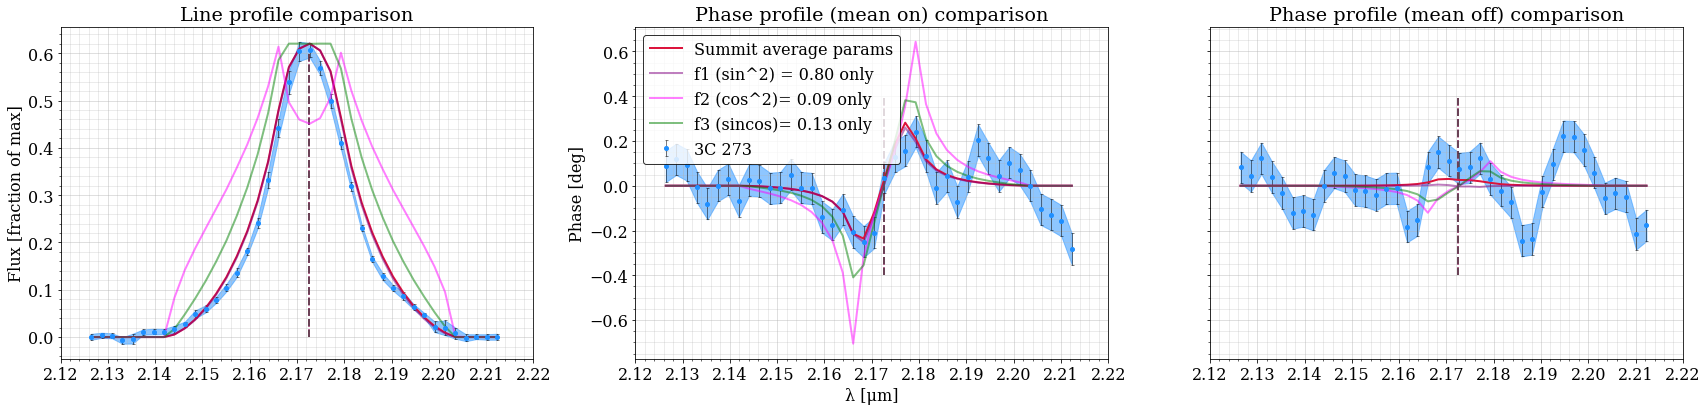

In [6]:
#making a guess at what it should be
#θ1 = [30.,3e3,0.7,30.,0.6,0.6,0.4,340.,1.1] #i,rBar,Mfac,rFac,f1,f2,f3,pa,scale -- 30.,1e3,1.1,1.,0.57,0.6,0.46,342.,1.1 is a good guess
θ1 = [30.,5590.94,0.36,15.80,0.80,0.84,0.75,320.,1.,0.]
#θ = [57.174,3680.964,0.540,20.158,0.653,0.480,0.447,342.295,0.994]
θ2 = [55.,5590.94,0.36,15.80,0.80,0.84,0.75,348.5,1.,0.]
θ1 = [56,4344.5,0.29796,26.27,0.7976,0.09175,0.12973,337.26,1.02321,0.00051]
θ2 = [56,4344.5,0.29796,26.27,0.7976,0.,0.,337.26,1.02321,0.00051]
θ3 = [56,4344.5,0.29796,26.27,0.,0.09175,0.,337.26,1.02321,0.00051]
θ4 = [56,4344.5,0.29796,26.27,0.,0.,0.12973,337.26,1.02321,0.00051]
labels = ["Summit average params","f1 (sin^2) = {:.2f} only".format(θ1[4]),"f2 (cos^2)= {:.2f} only".format(θ1[5]),"f3 (sincos)= {:.2f} only".format(θ1[6])]
colors = ["crimson","purple","magenta","green"]
αList = [1.,0.5,0.5,0.5]
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
λCen = 2.172
vel = (data[0]-λCen)/λCen*3e5
#print(log_prob(θ1,data)) #just proving it does change w/ inclination...
#print(log_prob(θ2,data))
fig,ax1,ax2,ax3=plotParams(data,[θ1,θ2,θ3,θ4],αList,colors,labels);
fig.savefig('windcomponents.png')

0.00 % complete

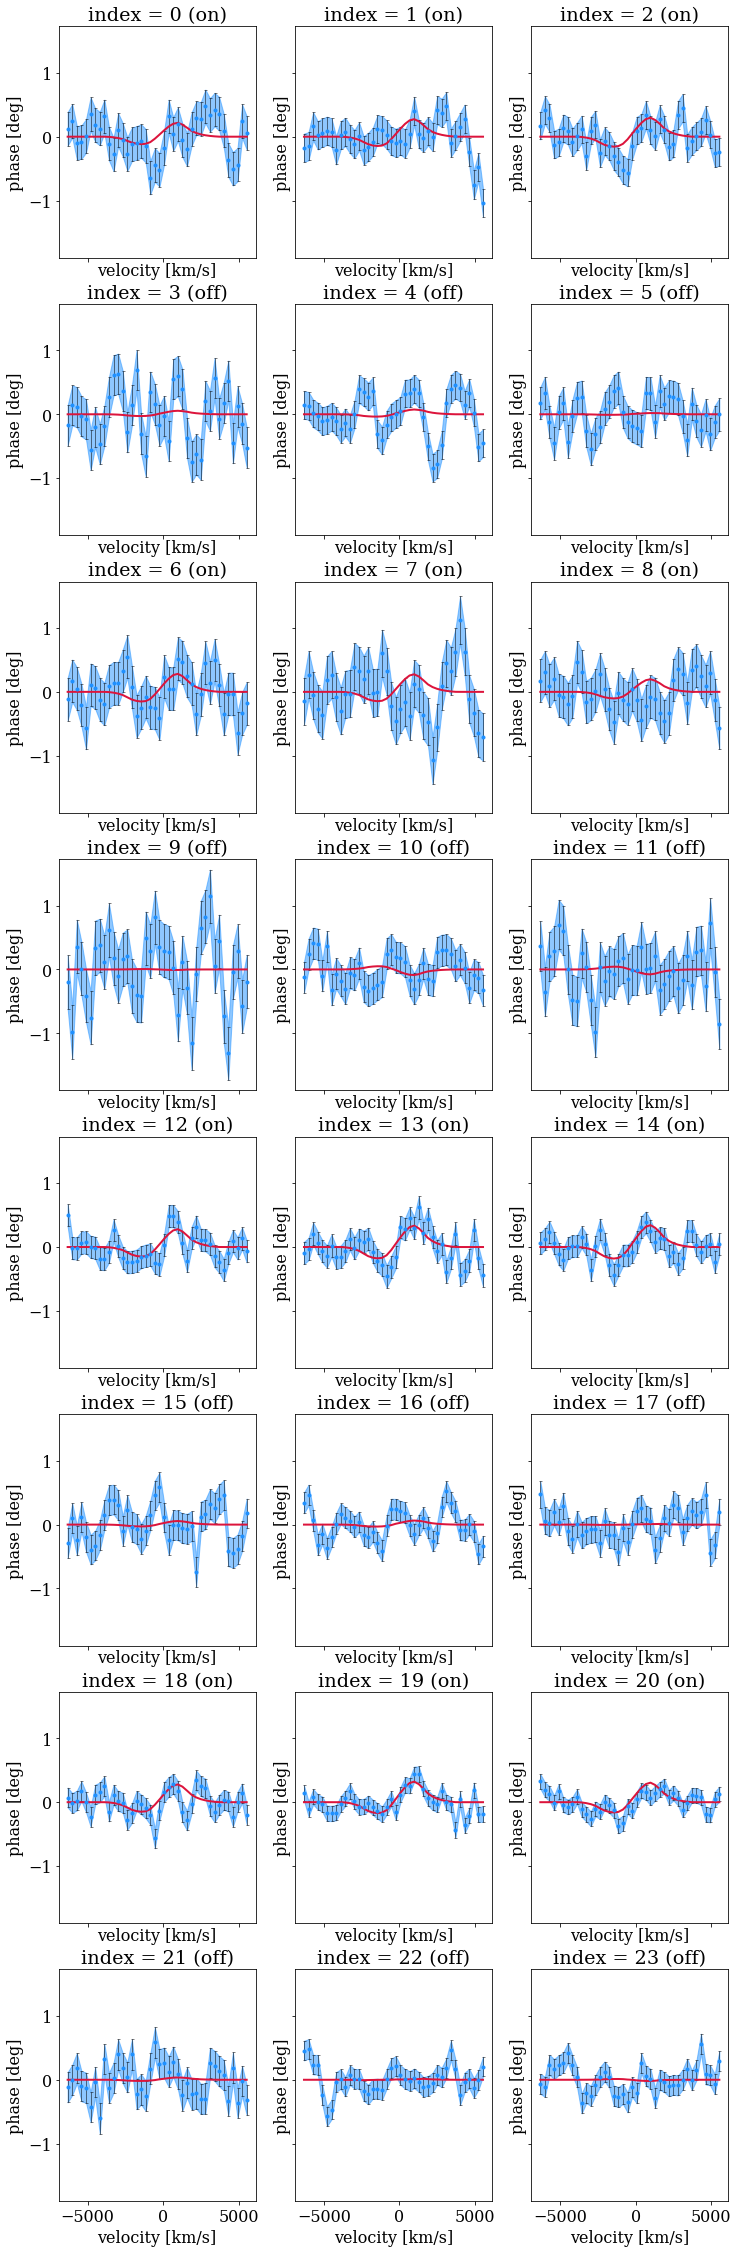

In [31]:
plotPhases(data,[θ],1);

In [ ]:
θList = flat_samples[np.random.randint(len(flat_samples),size=100)] #this looks like nonsense, investigate further
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
fig,ax1,ax2,ax3 = plotParams(data,θList)
fig.savefig('all_params_summit.png')

28.00 % complete

In [7]:
from IPython.display import display, Math
labels=["i","rBar","MFac","rFac","f1","f2","f3","PA","scale","cenShift"]
#labels = labels[:-1]
avgParams = []
for i in range(len(labels)):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    avgParams.append(mcmc[1])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.5f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
#old Summit run was [57.55,5590.94,0.36,15.8,0.8,0.84,0.75,348.5,1.,0.]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

![cloud parameters](cloudParams.png)

-670.0679452763486
-670.0679452763486
i = 89.11, rMin = 6320.89, MFac = 0.18, rFac = 39.42, f1 (sin^2) = 0.50, f2 (cos^2) = 0.54, f3 (sin*cos)= 0.89, pa = 323.26, scale = 0.97, cenShift = 0.0004
-774.4390119913583
100.00 % complete

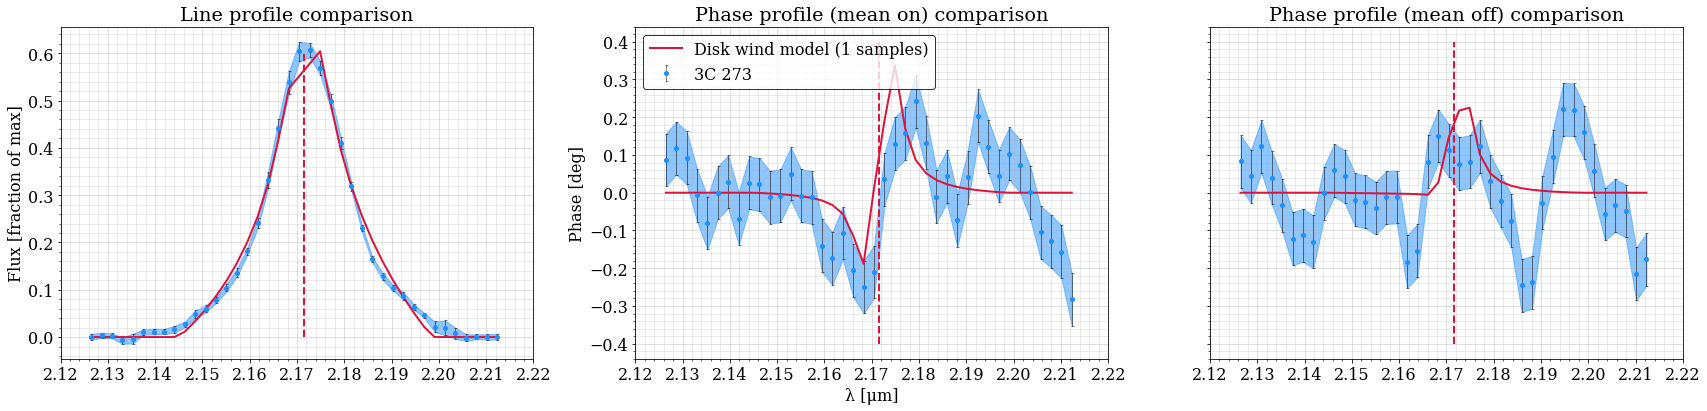

In [41]:
np.max(prob) #plot the best case
#probAll = [log_prob(flat_samples[i],data) for i in range(len(flat_samples))]
maxInd = np.argmax(prob)
#snd = np.partition(prob, 1)[1]
#minInd = np.argpartition(prob,4)[4]
#maxInd = np.argmax(prob)
θBest = flat_samples[maxInd] #prob matches with pos, NOT with flat_samples (idk why we have that one seems redundant to save both?)
print(np.max(prob))
print(log_lhood(θBest,data))
#θBest[8]*=0.8
#print(log_prob(θBest,data))
#i,rMin,Mfac,rFac,f1,f2,f3,pa,scale = θ
#θBest = [i,rMin,Mfac,rFac,f1,f2,f3,pa,scale,0.00035]
θ = np.copy(θBest)
# θ[-3] = 355.
print("""i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2) = {4:.2f}, f2 (cos^2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, \
pa = {7:.2f}, scale = {8:.2f}, cenShift = {9:.4f}""".format(*θ))

########## low inclination starting guess params ############
θ[0] = 20.#i
θ[1] = 1e3 #rBar
θ[2] = .5 #Mfac
θ[3] = 50. #rFac
θ[-2] = 1. #scale
θ[-1] = -0.0005#cenShift -- there was a problem here but it was graphical only
θ[4] = 1. #f1
θ[5] =0.05  #f2
θ[6] =1. #f3
θ[-3] = 350. #pa
# θ[-2] = 1.

############################################################
print(log_prob(θ,data))
fig,ax1,ax2,ax3=plotParams(data,[θBest],1)
fig.savefig('best_params_summit.png')
#fig.savefig('newstarting.png')

i = 77.96, rMin = 6247.84, MFac = 0.18, rFac = 39.38, f1 (sin^2) = 0.58, f2 (cos^2) = 0.29, f3 (sin*cos)= 0.64, pa = 330.54, scale = 0.98, cenShift = 0.0003
-672.7384343440883
100.00 % complete

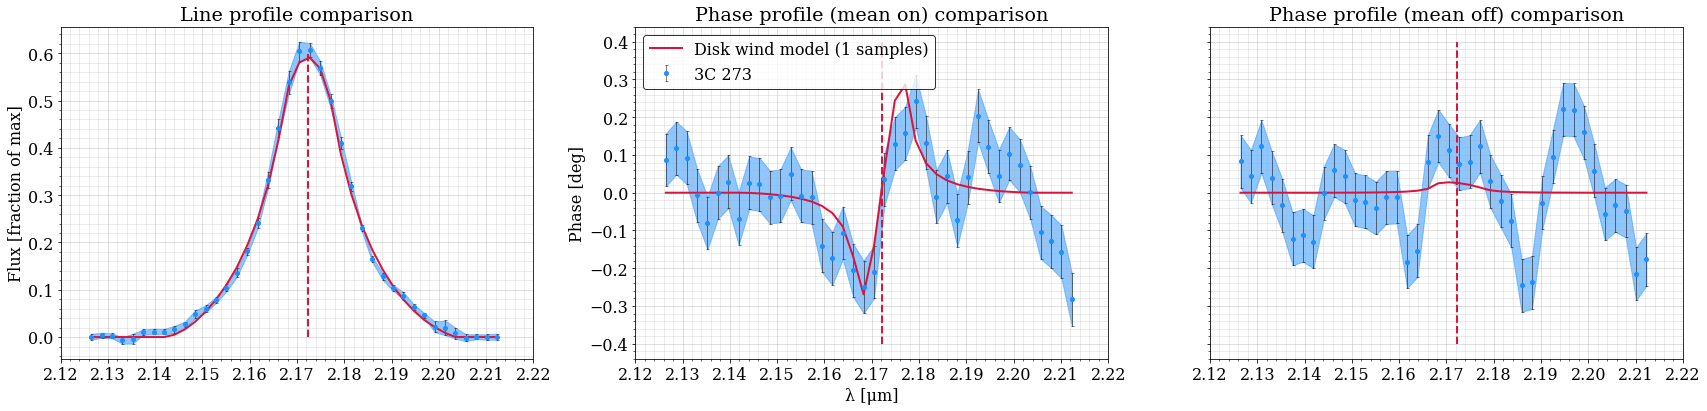

In [16]:
print("""i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2) = {4:.2f}, f2 (cos^2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, \
pa = {7:.2f}, scale = {8:.2f}, cenShift = {9:.4f}""".format(*avgParams))
print(log_lhood(avgParams,data))
fig,ax1,ax2,ax3=plotParams(data,[avgParams],1)
fig.savefig('avg_params_summit.png')

100.00 % complete

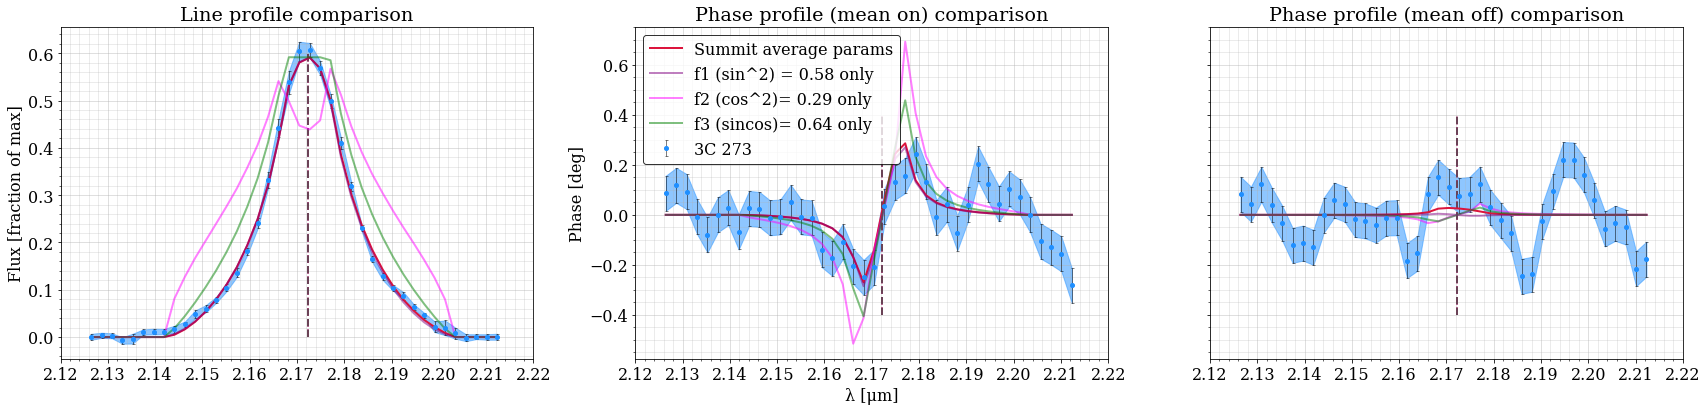

In [17]:
θ1 = np.copy(avgParams)
θ2 = np.copy(avgParams)
θ2[5],θ2[6] = 0.,0.
θ3 = np.copy(avgParams)
θ3[4],θ3[6] = 0.,0.
θ4 = np.copy(avgParams)
θ4[4],θ4[5] = 0.,0.
labels = ["Summit average params","f1 (sin^2) = {:.2f} only".format(θ1[4]),"f2 (cos^2)= {:.2f} only".format(θ1[5]),"f3 (sincos)= {:.2f} only".format(θ1[6])]
colors = ["crimson","purple","magenta","green"]
αList = [1.,0.5,0.5,0.5]
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
λCen = 2.172
vel = (data[0]-λCen)/λCen*3e5
#print(log_prob(θ1,data)) #just proving it does change w/ inclination...
#print(log_prob(θ2,data))
fig,ax1,ax2,ax3=plotParams(data,[θ1,θ2,θ3,θ4],αList,colors,labels);
fig.savefig('windcomponents.png')

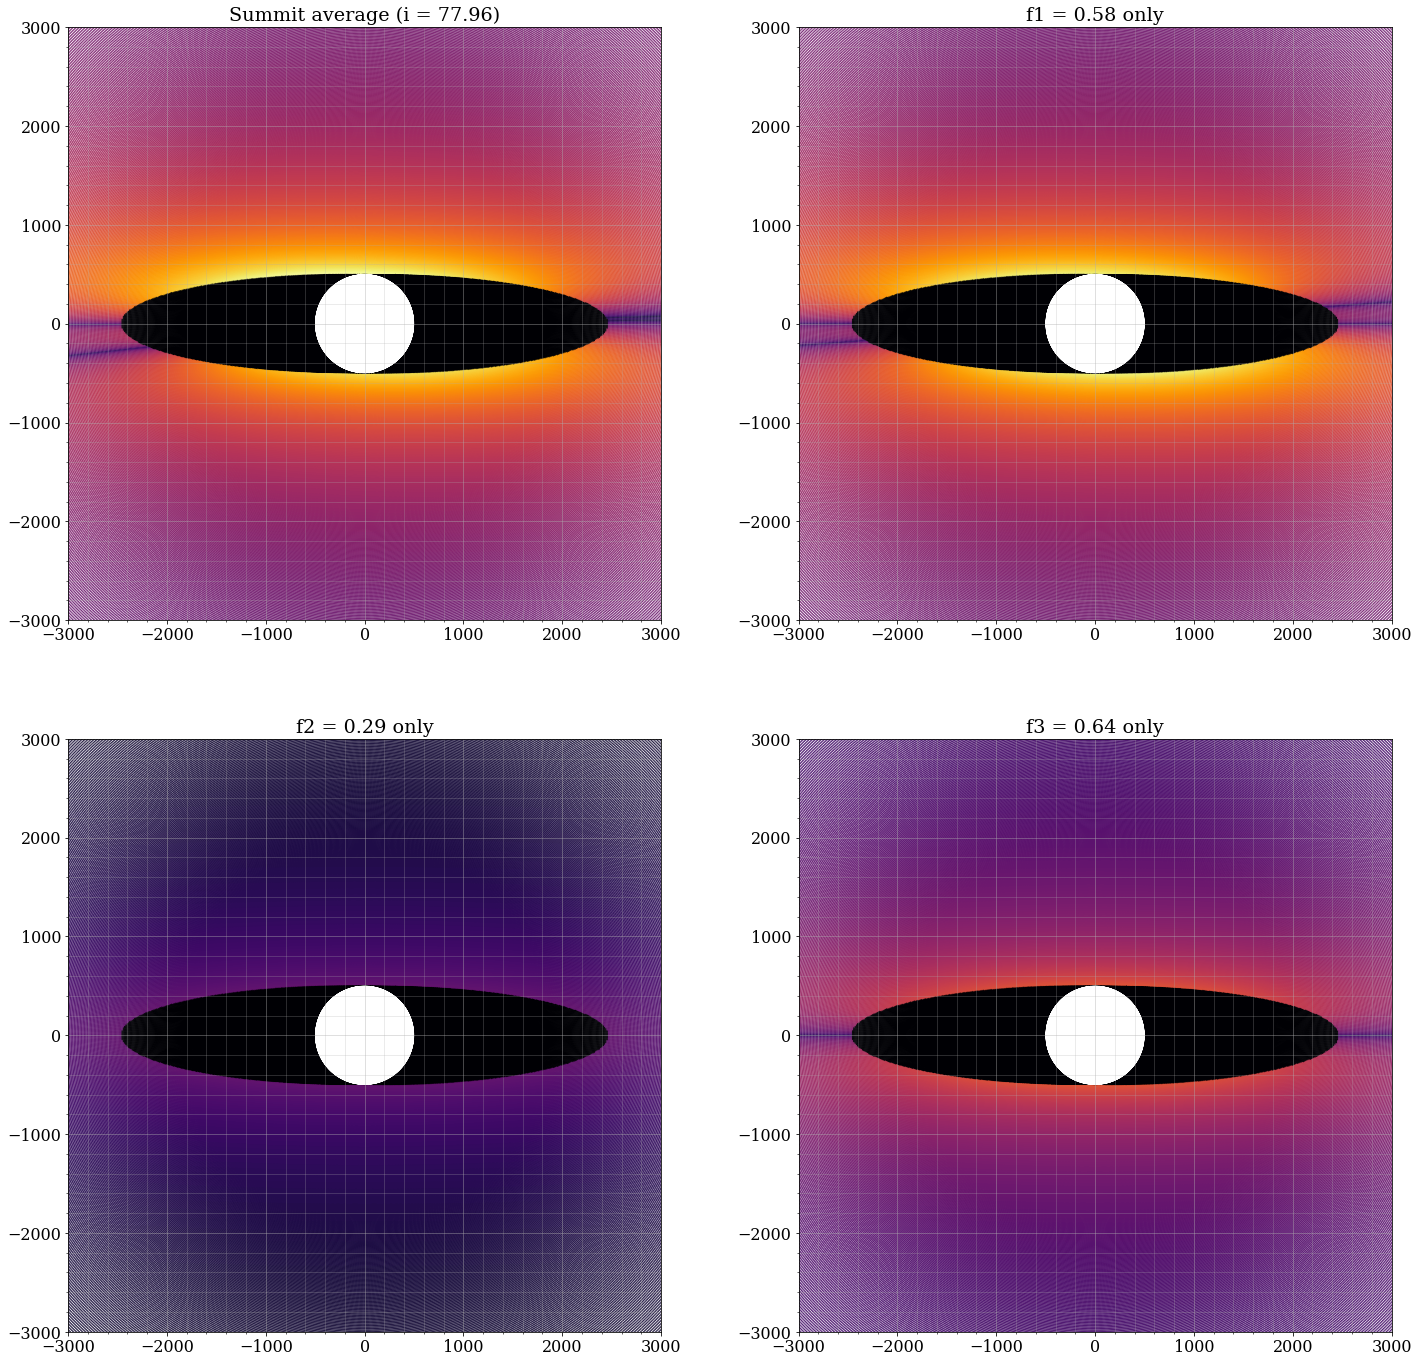

In [10]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(24,24))
def IWrapper(params,data,nr=1024,nϕ=2048): #this is ~3x as fast as python version!
    i,r̄,Mfac,rFac,f1,f2,f3,pa,scale,cenShift = params; scale = 1.; windWeight = 1.; γ = 1.; A0 = 1.; τ = 10. #some parameters fixed for now
    α,β,r,νloc,ϕ,sini,cosi,dA,rMin,rMax = DiskWind.setup(i,nr,nϕ,r̄,rFac,γ)
    I,γ,A0,τ = DiskWind.getIntensity(r,ϕ,windWeight,sini,cosi,rMin,rMax,γ,A0,τ,f1=f1,f2=f2,f3=f3)
    return I,α,β,νloc


θBest = np.copy(avgParams)#doing average because best usually approaches 90


I,α,β,ν = IWrapper(θBest,data)
tmpθ = np.copy(θBest)
tmpθ[5] = 0. #f1 only
tmpθ[6] = 0.
I1,α,β,ν= IWrapper(tmpθ,data)
tmpθ = np.copy(θBest)
tmpθ[4] = 0.
tmpθ[6] = 0. #f2 only
I2,α,β,ν = IWrapper(tmpθ,data)
tmpθ = np.copy(θBest)
tmpθ[4] = 0.
tmpθ[5] = 0. #f3 only
I3,α,β,ν = IWrapper(tmpθ,data)
fList = [θBest[4],θBest[5],θBest[6]]
IList = [I,I1,I2,I3]
for i in range(len(IList)):
    ax = axs.flatten()[i]; Iloop = IList[i];
    ax.scatter(α,β,marker='.',s=1,c=Iloop**0.25,cmap='inferno',vmin=0.0,vmax=np.max(IList[0]**0.25));
    #ax.plot(1e3*np.cos(φ),1e3*np.sin(φ),c='k');
    ax.set_xlim(-3e3,3e3); ax.set_ylim(-3e3,3e3)
    ax.set_aspect(1)
    title = "f{0} = {1:.2f} only".format(i,fList[i-1]) if i>0 else "Summit average (i = {:.2f})".format(θBest[0])
    ax.set_title(title)
    ax.minorticks_on()
    ax.grid(b=True,which="major",alpha=0.5)
    ax.grid(b=True,which="minor",alpha=0.3)
fig.savefig('fcomparison.png',dpi=150)

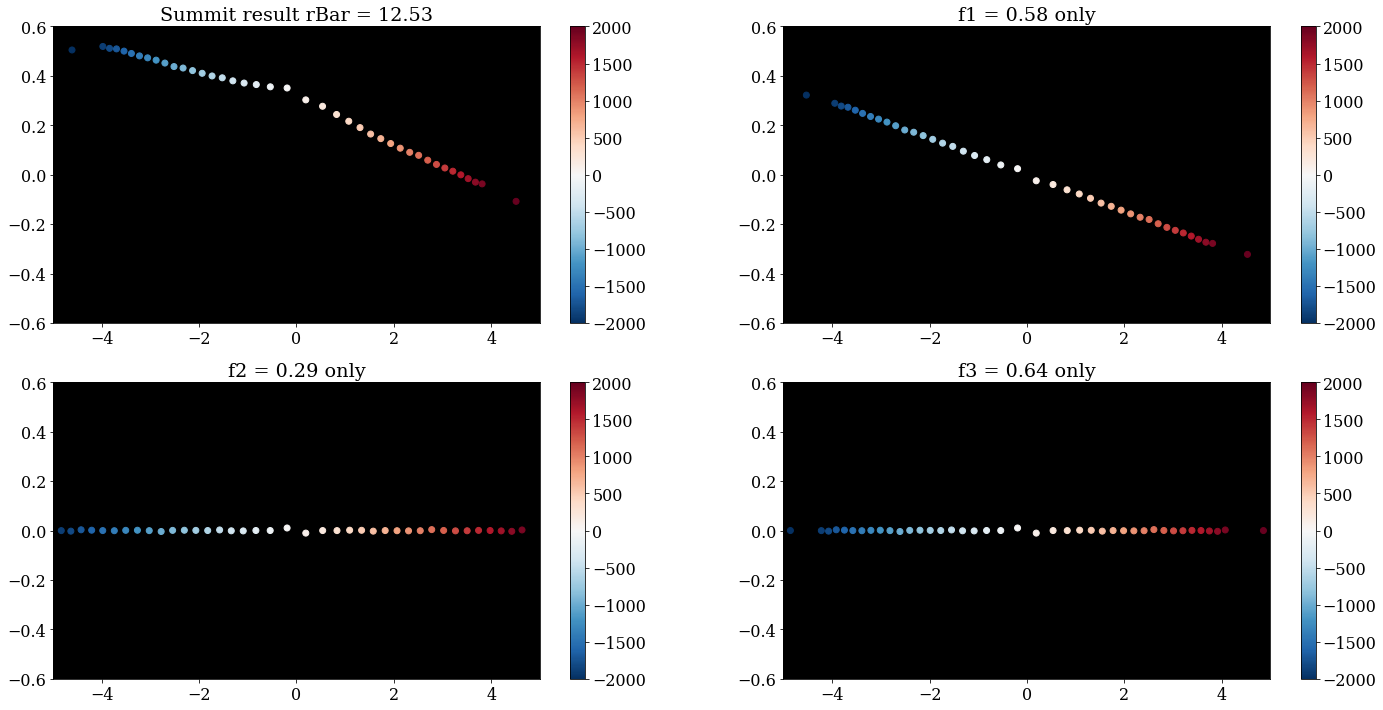

In [14]:
blRange = θBest[2]*3e8*2e33*6.67e-8/9e20/548/3.09e24
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(24,12),facecolor="white")
channels = [-2000+i*100 for i in range(41)]
λCen = 2.172+θBest[-1]
vel = (ν-1.)*3e5
for i in range(len(IList)):
    ax = axs.flatten()[i]; Iloop = IList[i];
    xC,yC = np.zeros(len(channels)), np.zeros(len(channels))
    for j in range(len(channels)):
        if j==0:
            mask = np.where((vel<channels[j]))
        elif j==(len(channels)-1):
            mask = np.where((vel>channels[j]))
        else:
            mask = np.where((vel>channels[j-1]) & (vel<channels[j]))
        
        xCen = np.sum(Iloop[mask]*α[mask])/np.sum(Iloop[mask]); yCen = np.sum(Iloop[mask]*β[mask])/np.sum(Iloop[mask])
        xC[j],yC[j] = xCen,yCen
        
    #s=ax.scatter(xC*2*blRange/4.85e-12,yC*2*blRange/4.85e-12,c=(νBin-1)*3e5,cmap="RdBu",vmin=-2e3,vmax=2e3)
    s=ax.scatter(xC*2*blRange/4.85e-12,yC*2*blRange/4.85e-12,c=channels,cmap="RdBu_r")
    ax.set_xlim(-5,5); ax.set_ylim(-0.6,0.6)
    plt.colorbar(s,ax=ax);
    title = "f{0} = {1:.2f} only".format(i,fList[i-1]) if i>0 else "Summit result rBar = {:.2f}".format(θBest[1]*2*θBest[2]*3e8*2e33*6.67e-8/9e20/548/3.09e24/4.85e-12)
    ax.set_title(title)
    ax.set_facecolor("k")
fig.savefig('centroidscomparison.png',dpi=150)

In [18]:
np.sum(IList[3])

0.0

(-5000.0, 0.0)

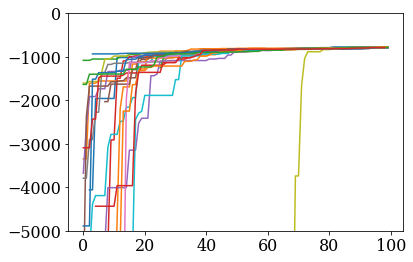

In [27]:
np.shape(prob)
for i in range(24):
    plt.plot(prob[i:-1:24])
plt.ylim(-5e3,0)

In [9]:
for i in range(0,len(flat_samples),24*10):
    θ = flat_samples[i]
    fig,ax1,ax2,ax3=plotParams(data,[θ],1)
    ax1.annotate("log_prob = {0:.2f}".format(log_prob(θ,data)),(-6e3,0.6))
    fig.savefig('tmpPlots/frame_{0:03d}'.format(int(i/(24*10)+1)))
    plt.close('all')

100.00 % complete

In [139]:
for i in range(len(samples[:,0,:])):
    θ = samples[i,0,:]
    fig,ax1,ax2,ax3=plotParams(data,[θ],1)
    ax1.annotate("log_prob = {0:.2f}".format(log_prob(θ,data)),(-6e3,0.6))
    fig.savefig('tmpPlots/frame_{0:03d}'.format(i+1))
    plt.close('all')

NameError: name 'samples' is not defined

In [10]:
import subprocess as s
def makeAnim(clean=True):
    s.run('ffmpeg -framerate 30 -i "tmpPlots/frame_%03d.png" -c:v libx264 -preset slow -coder 1 -movflags +faststart -g 15 -crf 18 -pix_fmt yuv420p -profile:v high -y -bf 2 "anim.mp4"',shell=True)
    if clean==True:
        print("cleaning up png files")
        s.run('rm tmpPlots/*',shell=True)
        
makeAnim()

cleaning up png files


In [12]:
print("i = {0:.2f}, rBar = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2) = {4:.2f}, f2 (cos^2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, PA = {7:.2f}, scale = {8:.2f}, cenShift = {9:.5f}".format(θBest[0],θBest[1],θBest[2],θBest[3],θBest[4],θBest[5],θBest[6],θBest[7],θBest[8],θBest[9]))

i = 89.66, rBar = 7411.91, MFac = 0.22, rFac = 18.22, f1 (sin^2) = 0.02, f2 (cos^2) = 0.77, f3 (sin*cos)= 0.03, PA = 347.61, scale = 0.93, cenShift = 0.00047


0.00 % complete

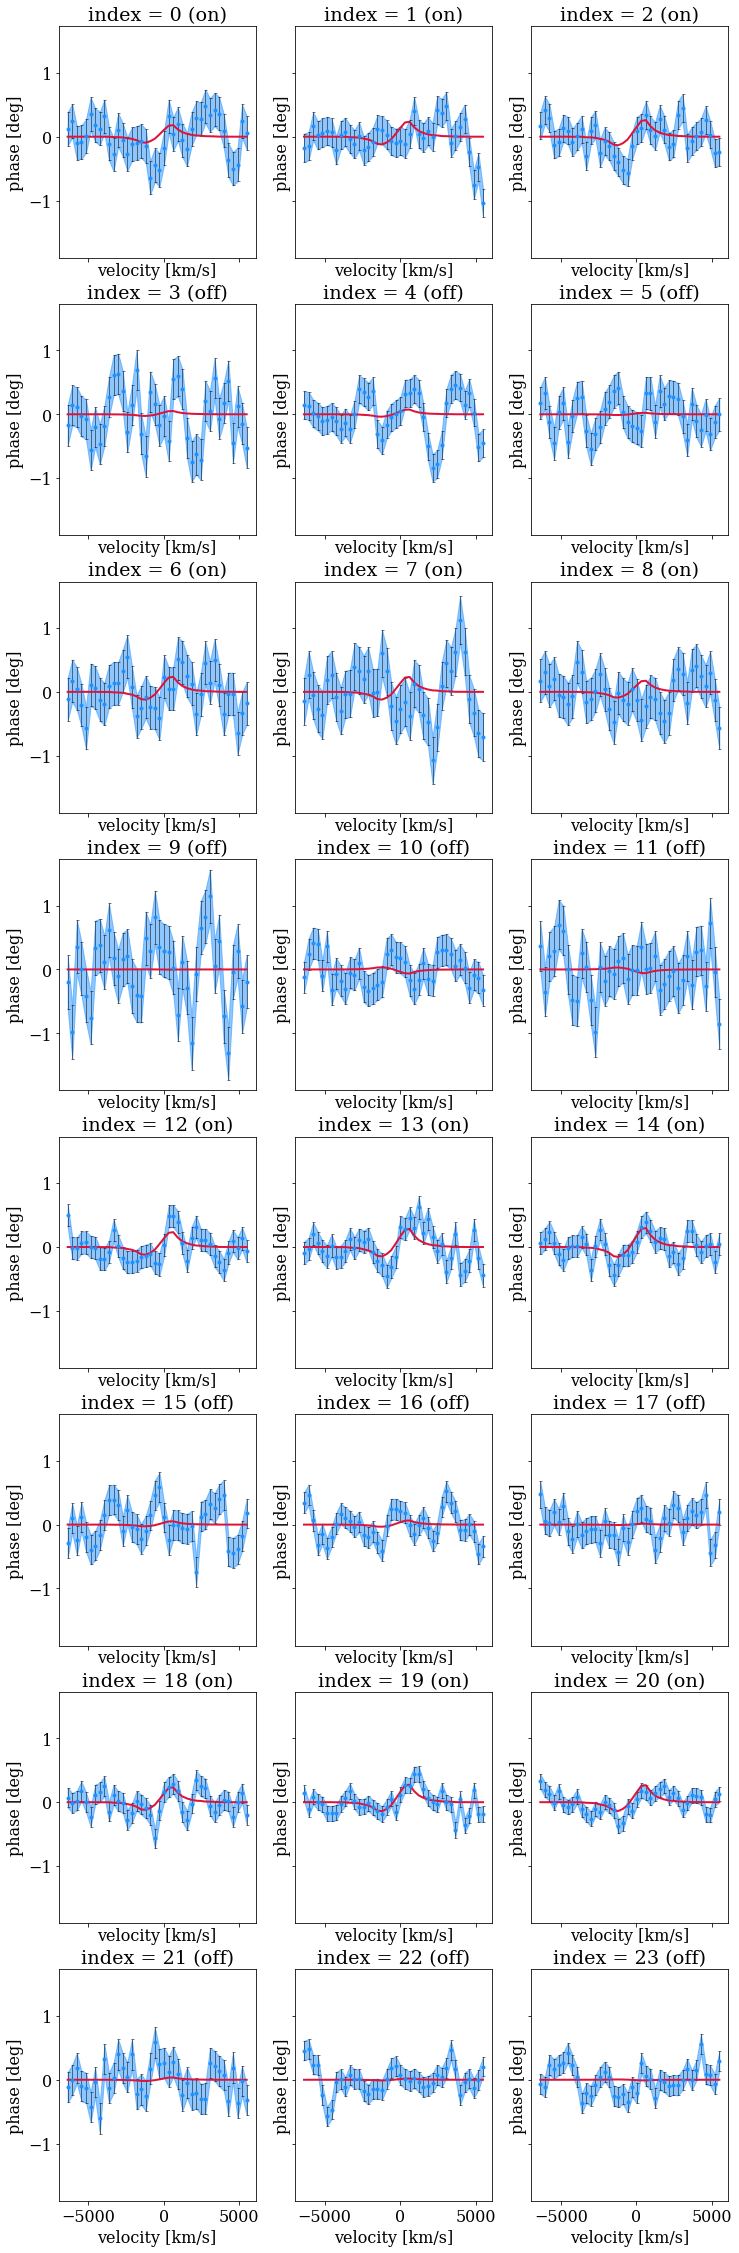

In [16]:
#theta computer (2k iterations, started near i = 30) i = 41.65, rBar = 3237.49, MFac = 0.56, rFac = 15.62, f1 (sin^2) = 0.47, f2 (cos^2) = 0.91, f3 (sin*cos)= 0.62, PA = 345.77, scale = 1.02, cenShift = 0.00048
plotPhases(data,[θBest],1);

In [20]:
vel,line,phaseList = getProfiles(θBest,data)
yLErr = data[6]
lnlikeLine = -0.5*numpy.sum(((data[3]-line)/yLErr)**2)
lnlikeLine

-35.55285149323332

In [15]:
def rBar(γ,rMin=710.14,rMax=3e4):
    num = (rMax**(γ-3/2)-rMin**(γ-3/2))*(1-1/(γ-3/2))
    den = rMax**(γ-5/2)-rMin**(γ-5/2) 
    return num/den
rBar(1,1e3,1.5e4)
def get_rMinMax(rBar,rFac,γ=1):
        rMin = rBar*(rFac**(γ-5/2)-1)/(rFac**(γ-3/2)-1)*(γ-3/2)/(γ-5/2)
        rMax = rMin*rFac
        return rMin,rMax
get_rMinMax(rBar(1,1e3,1.5e4),15)

(1000.0000000000001, 15000.000000000002)

In [13]:
blRange=θBest[2]*3e8*2e33*6.67e-8/9e20/548/3.09e24
print("rough size = {:.2f} μas".format(θBest[1]*blRange*2/4.85e-12))

rough size = 11.84 μas


In [13]:
def δrBar(rBar,γ,δrMin,rMin=710.14,rMax=3e4): #this is wrong
    pre = rBar*(1-1/(γ-3/2))
    t1 = (rMin**(γ-5/2))*(γ-3/2)*δrMin/(rMax**(γ-3/2)-rMin**(γ-3/2))
    t2 = (rMin**(γ-7/2))*(γ-5/2)*δrMin/(rMax**(γ-5/2)-rMin**(γ-5/2))
    return pre*np.sqrt(t1**2+t2**2)

In [16]:
mcmc = np.percentile(flat_samples[:,1], [16, 50, 84])
q = np.diff(mcmc) #get upper and lower bounds for rMin
lower = q[0]; upper = q[1]
δrBarU = δrBar(rBar(1),1,upper); δrBarL = δrBar(rBar(1),1,lower)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(rBar(1)*blRange/4.85e-12, δrBarL*blRange/4.85e-12, δrBarU*blRange/4.85e-12, "r bar")
display(Math(txt)) #super wrong

<IPython.core.display.Math object>